# THE SPARKS FOUNDATION 
**Data Science & Business Analytics**

## Task-1: Prediction using Supervised ML
Predict the percentage of a student based on the number of study hours

*Author* : **RAHUL KUMAR**

### 1. Importing important packages and libraries ###


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
from sklearn import metrics  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import timeit
import seaborn as sns
%matplotlib inline

### 2. Importing the given dataset and printing its values ###

In [2]:
# Reading or importing data from the given remote link
url = "http://bit.ly/w-data"
p_data = pd.read_csv(url)
print("Data imported successfully")

p_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 3. Exploratory Data Analysis ###

In [3]:
print("\nData size :",p_data.shape)
print("\nNumber of records :",len(p_data))
print("\nNumber of atrributes :",len(p_data.columns))
p_data.describe()


Data size : (25, 2)

Number of records : 25

Number of atrributes : 2


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# Check if there is any missing (or null) value in the Dataset
p_data.isnull==True

False

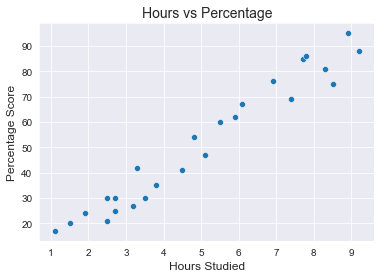

In [5]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
sns.scatterplot(y= p_data['Scores'], x= p_data['Hours'])
plt.title('Hours vs Percentage', size=14)  
plt.xlabel('Hours Studied', size=12)  
plt.ylabel('Percentage Score', size=12)  
plt.show()

**From the graph above, we can clearly see that there is a positive linear correlation between the number of hours studied and percentage of score.**

### 4. Data Preparation ###
We will divide the dataset into "attributes" (inputs) and "labels" (outputs). Furthermore, we will split our dataset into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.


In [6]:
#Dividing data into input(x) & output(y)
X = p_data.iloc[:, :-1].values  
y = p_data.iloc[:, 1].values

#Splitting of data into training and test sets with 20% test data and 80% training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### 5. Training the Algorithm ###
After splitting our dataset into training and test sets, we will now train our Linear regression algorithm.

In [7]:
#Calculate start time
start = timeit.default_timer()

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

print("Training complete.")

Training complete.


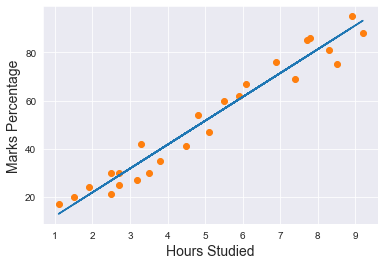

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
sns.set_style('darkgrid')
sns.scatterplot(x= p_data['Hours'], y= p_data['Scores'])
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### 6. Making Predictions ###
Now that we have trained our algorithm, it's time to make some predictions

In [9]:
print(X_test) # Testing data - In Hours

#Calculate start time
start = timeit.default_timer()

y_pred = regressor.predict(X_test) # Predicting the scores

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


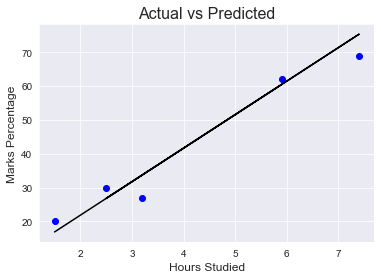

In [11]:
#Comparing and plotting the predicted marks with the actual marks
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=16)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Predicted score if a student studies for 9.25 hrs/ day ###

In [12]:
#Testing with 9.25 hours of study per day
hours = [9.25]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [9.25]
Predicted Score = 93.69173248737535


**As indicated by our linear regression model if a student studies for 9.25 hours per day he/she is probably going to score 93.69 marks overall.**

### 7. Evaluating the model ###
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Using Scikit-Learn’s ‘metric’ library (which contains the ‘mean_absolute_error’ & 'mean_squared_error'), we'll evaluate the error in our model. We have also found out the train and test time of our linear regression algorithm.


In [13]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Train Time(s):  0.002332500000001403
Test Time(s):  0.0005443999999990012


**Lesser the Mean Absolute Error (MAE) & Mean Squared Error (MSE) will be, more accuracy our model will portray. In terms of time taken to train & test the model, Linear Regression algorithm took 0.00233 seconds for training & 0.00054 seconds for testing which is very fast.**